<a href="https://colab.research.google.com/github/vivekbiragoni/social_computing/blob/main/IT480_SC_VinayakaSN211AI040_VivekVittalBiragoni211AI041.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social computing assignement 1
by vivek vittal biragoni 211AI041
and Vinayaka SN 211AI040

# Trials while learning, after some trial and errors we have in the later part chosen to work on the email-Eu-core network dataset.

In the beginning of this file we have explored on the different libraries to deal with graphs like PyG and networkX

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import convert

In [ ]:
!pip install powerlaw

import torch

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric


Looking in links: https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 97.6 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 45.3 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 39.2 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.1/932.1 kB 18.4 MB/s eta 0:00:00
  Using cached torch_geometric-2.4.0-py3-none-any.whl (1.0 MB)


In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import degree
import pandas as pd


# Load data from files
node_file_path = '/content/sample_data/NA.cnode'
edge_file_path = '/content/sample_data/NA.cedge'


# Read node data
node_data = pd.read_csv(node_file_path, header=None, names=['Node ID', 'X Coordinate', 'Y Coordinate'], delimiter=' ')
x = torch.tensor(node_data[['X Coordinate', 'Y Coordinate']].values, dtype=torch.float)

#  Read edge data
edge_data = pd.read_csv(edge_file_path, header=None, names=['Edge ID', 'Start Node ID', 'End Node ID', 'L2 Distance'], delimiter=' ')
edge_index = torch.tensor(edge_data[['Start Node ID', 'End Node ID']].values.transpose(), dtype=torch.long)

# Create PyG Data object
data = Data(x=x, edge_index=edge_index)

# Calculate degrees
deg = degree(data.edge_index[0], num_nodes=data.num_nodes)

# Calculate average degree
avg_degree = deg.float().mean().item()

print(f"Average Degree: {avg_degree}")

Average Degree: 1.0191453695297241


In [ ]:
import torch
from torch_geometric.data import Data

# Initialize lists to store node features and edge indices
node_features = []
edge_indices = []

# Read node data and add features to the list
with open(node_file_path, 'r') as node_file:
    for line in node_file:
        node_id, x, y = map(float, line.strip().split())
        node_features.append([x, y])

# Read edge data and add indices to the list
with open(edge_file_path, 'r') as edge_file:
    for line in edge_file:
        edge_id, start_node, end_node, distance = map(float, line.strip().split())
        edge_indices.append([start_node, end_node])

# Convert lists to PyTorch tensors
x = torch.tensor(node_features, dtype=torch.float)
edge_index = torch.tensor(edge_indices, dtype=torch.long).t().contiguous()
# edge_index = torch.tensor(edge_indices, dtype=torch.long)

# Ensure that the edge indices are in the correct shape
edge_index = edge_index.view(2, -1)

# Create PyG Data object
data = Data(x=x, edge_index=edge_index)

# Print the PyG Data object
print(data)


Data(x=[175813, 2], edge_index=[2, 179179])


In [ ]:
# Print sample node data
print("Sample Node Data:")
print(node_data.head())

# Print sample edge data
print("\nSample Edge Data:")
print(edge_data.head())

# Print sample node features (x)
print("Sample Node Features (x):")
print(x[:5])  # Print the first 5 rows for example

# Print sample edge connections (edge_index)
print("\nSample Edge Connections (edge_index):")
print(edge_index[:, :6])  # Print the first 5 columns for example


Sample Node Data:
   Node ID  X Coordinate  Y Coordinate
0        0   3565.246826   3489.291748
1        1   3567.920898   3479.724365
2        2   3565.295166   3490.652832
3        3   3564.935059   3490.473633
4        4   3564.358887   3492.821533

Sample Edge Data:
   Edge ID  Start Node ID  End Node ID  L2 Distance
0        0              0            1     9.934056
1        1              0            2     1.361942
2        2              2            3     0.402231
3        3              3            4     2.417563
4        4              4            5     4.921632
Sample Node Features (x):
tensor([[3565.2468, 3489.2917],
        [3567.9209, 3479.7244],
        [3565.2952, 3490.6528],
        [3564.9351, 3490.4736],
        [3564.3589, 3492.8215]])

Sample Edge Connections (edge_index):
tensor([[0, 0, 2, 3, 4, 5],
        [1, 2, 3, 4, 5, 6]])


In [ ]:
from torch_geometric.utils import degree

# Calculate degrees
deg = degree(data.edge_index[0], num_nodes=data.num_nodes)

# Print the degrees
print(deg)


tensor([2., 1., 1.,  ..., 1., 1., 0.])


tensor([2., 1., 1.,  ..., 1., 1., 0.])

Node Degree 	 Frequency
2.0 		 4668
1.0 		 164485
3.0 		 1369
0.0 		 5024
4.0 		 170
5.0 		 52
7.0 		 17
6.0 		 20
8.0 		 4
9.0 		 2
11.0 		 2


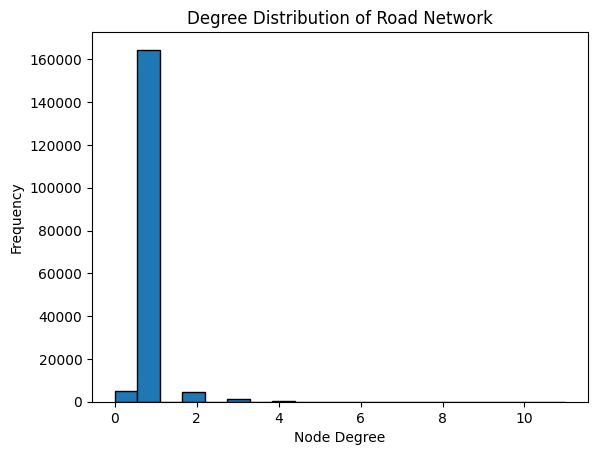

In [ ]:
from torch_geometric.utils import degree

# Calculate degrees
deg = degree(data.edge_index[0], num_nodes=data.num_nodes)

# Print the degrees
print(deg)



# Count the frequencies of unique degrees
degree_counts = dict()
for d in deg.numpy():
    degree_counts[d] = degree_counts.get(d, 0) + 1

# Print out the unique degrees and their frequencies
print("\nNode Degree \t Frequency")
for degree, frequency in degree_counts.items():
    print(f"{degree} \t\t {frequency}")

# Plot the degree distribution
plt.hist(deg.numpy(), bins=20, edgecolor='black')
plt.title('Degree Distribution of Road Network')
plt.xlabel('Node Degree')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Convert PyG Data to NetworkX graph
G = convert.to_networkx(data)

# Visualize the graph using NetworkX and Matplotlib
pos = nx.spring_layout(G)  # You can use other layout algorithms as well
nx.draw(G, pos, with_labels=True, node_size=50)
plt.title('Graph Visualization')
plt.show()

KeyboardInterrupt: 

In [ ]:
# Assuming the files are in the same directory as your script or notebook
node_file_path = '/content/sample_data/NA.cnode'
edge_file_path = '/content/sample_data/NA.cedge'


# Create an undirected graph
G = nx.Graph()

# Read node data and add nodes to the graph
with open(node_file_path, 'r') as node_file:
    for line in node_file:
        node_id, x, y = map(float, line.strip().split())
        G.add_node(node_id, pos=(x, y))

# Read edge data and add edges to the graph
with open(edge_file_path, 'r') as edge_file:
    for line in edge_file:
        edge_id, start_node, end_node, distance = map(float, line.strip().split())
        G.add_edge(start_node, end_node, weight=distance)

# Calculate the average degree
average_degree = sum(dict(G.degree()).values()) / len(G)

print(f"Average Degree: {average_degree}")


Average Degree: 2.037414753175249


Node Degree 	 Frequency
2 		 166810
4 		 1563
3 		 4767
1 		 2385
5 		 178
6 		 62
8 		 15
7 		 22
9 		 7
10 		 1
12 		 1
11 		 1
14 		 1


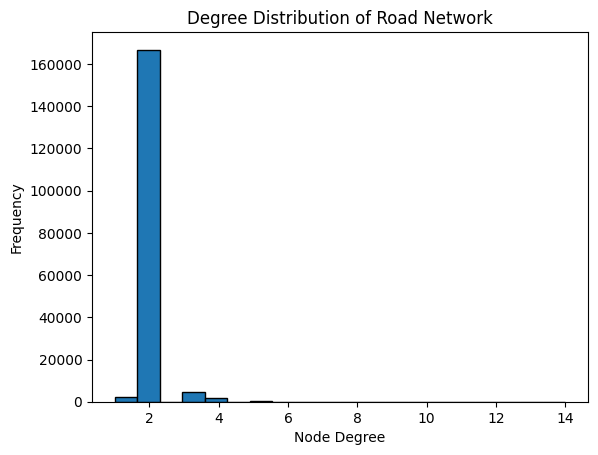

In [ ]:
# Calculate the degree of each node
degrees = dict(G.degree())
# Extract degree values
degree_sequence = list(degrees.values())

# Count the frequencies of unique degrees
degree_counts = dict()
for degree in degree_sequence:
    degree_counts[degree] = degree_counts.get(degree, 0) + 1

# Print out the unique degrees and their frequencies
print("Node Degree \t Frequency")
for degree, frequency in degree_counts.items():
    print(f"{degree} \t\t {frequency}")

# Plot the degree distribution
plt.hist(degrees.values(), bins=20, edgecolor='black')
plt.title('Degree Distribution of Road Network')
plt.xlabel('Node Degree')
plt.ylabel('Frequency')
plt.show()

- **Node Degree 2:** This is the most frequent degree, indicating a large number of nodes with only two connections. As discussed earlier, this could represent straight road segments connecting two intersections or locations.

- **Node Degrees 3, 4, 5, etc.:** These represent nodes with slightly higher degrees, indicating intersections or locations where multiple roads converge. The frequencies decrease as the degree increases.

- **Higher Node Degrees (6 and above):** These correspond to nodes with even higher connectivity, likely representing major intersections or hubs in the road network.

The distribution reflects the network's topology, highlighting the prevalence of nodes with lower degrees and a few nodes with higher degrees.

Calculating best minimal value for power law fit


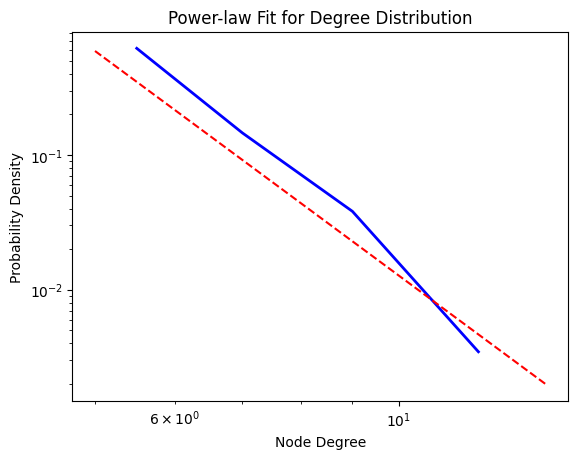

Power-law alpha parameter: 5.528201638046653


In [ ]:
import powerlaw

# Extract degree values
degree_sequence = list(degrees.values())

# Fit the power-law distribution
fit = powerlaw.Fit(degree_sequence, discrete=True)

# Plot the data and the fitted power-law distribution
fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=plt.gca())

plt.title('Power-law Fit for Degree Distribution')
plt.xlabel('Node Degree')
plt.ylabel('Probability Density')
plt.show()

# Display the fitted alpha parameter for the power-law distribution
print(f'Power-law alpha parameter: {fit.alpha}')

In [ ]:
# Diameter
diameter = nx.diameter(G)
print(f"Diameter of the Network: {diameter}")

In [ ]:
# Average Path Length
average_path_length = nx.average_shortest_path_length(G, weight='weight')
print(f"Average Path Length: {average_path_length}")

In [ ]:
# Shortest Path
source_node = 1  # Replace with the actual source node ID
target_node = 100  # Replace with the actual target node ID
shortest_path = nx.shortest_path(G, source=source_node, target=target_node, weight='weight')
shortest_path_length = nx.shortest_path_length(G, source=source_node, target=target_node, weight='weight')
print(f"Shortest Path from Node {source_node} to Node {target_node}: {shortest_path}")
print(f"Shortest Path Length: {shortest_path_length}")

Shortest Path from Node 1 to Node 100: [1, 7.0, 8.0, 9.0, 10.0, 12.0, 17.0, 19.0, 20.0, 24.0, 26.0, 31.0, 38.0, 39.0, 40.0, 58.0, 59.0, 66.0, 74.0, 77.0, 78.0, 84.0, 85.0, 87.0, 89.0, 93.0, 97.0, 99.0, 100]
Shortest Path Length: 225.621309


In [ ]:
import networkx as nx

# Assuming G is your graph
source_node = 1  # Replace with your source node ID
target_node = 10  # Replace with your target node ID

# Check if there is a path between the nodes
if nx.has_path(G, source_node, target_node):
    geodesic_length = nx.shortest_path_length(G, source=source_node, target=target_node)
    print(f"The geodesic path length between {source_node} and {target_node} is {geodesic_length}.")
else:
    print(f"There is no path between {source_node} and {target_node} in the graph.")


The geodesic path length between 1 and 10 is 4.


In [ ]:
clustering_coefficients = nx.clustering(G)

# Calculate average clustering coefficient for the entire graph
average_clustering_coefficient = nx.average_clustering(G)

# Print results
for node, cc in clustering_coefficients.items():
    print(f"Clustering coefficient for node {node}: {cc}")

print(f"\nAverage clustering coefficient for the graph: {average_clustering_coefficient}")

Streaming output truncated to the last 5000 lines.
Clustering coefficient for node 170815.0: 0
Clustering coefficient for node 170816.0: 0
Clustering coefficient for node 170817.0: 0
Clustering coefficient for node 170818.0: 0
Clustering coefficient for node 170819.0: 0
Clustering coefficient for node 170820.0: 0
Clustering coefficient for node 170821.0: 0
Clustering coefficient for node 170822.0: 0
Clustering coefficient for node 170823.0: 0
Clustering coefficient for node 170824.0: 0
Clustering coefficient for node 170825.0: 0
Clustering coefficient for node 170826.0: 0
Clustering coefficient for node 170827.0: 0
Clustering coefficient for node 170828.0: 0
Clustering coefficient for node 170829.0: 0
Clustering coefficient for node 170830.0: 0
Clustering coefficient for node 170831.0: 0
Clustering coefficient for node 170832.0: 0
Clustering coefficient for node 170833.0: 0
Clustering coefficient for node 170834.0: 0
Clustering coefficient for node 170835.0: 0
Clustering coefficient fo

In [ ]:
scc_count = nx.number_strongly_connected_components(G)

# Print the result
print(f"Number of Strongly Connected Components: {scc_count}")

NetworkXNotImplemented: not implemented for undirected type

In [ ]:
wcc_count = nx.number_weakly_connected_components(G)

# Print the result
print(f"Number of Weakly Connected Components: {wcc_count}")

NetworkXNotImplemented: not implemented for undirected type

In [ ]:
components = list(nx.connected_components(G))

giant_component = max(components, key=len)

# Create a subgraph for the giant component
giant_subgraph = G.subgraph(giant_component)

# Calculate properties for the giant component
shortest_path = nx.shortest_path(giant_subgraph)
average_path_length = nx.average_shortest_path_length(giant_subgraph)
diameter = nx.diameter(giant_subgraph)
average_clustering_coefficient = nx.average_clustering(giant_subgraph)

# Print the results
print(f"Shortest Path in Giant Component: {shortest_path}")
print(f"Average Path Length in Giant Component: {average_path_length}")
print(f"Diameter of Giant Component: {diameter}")
print(f"Average Clustering Coefficient in Giant Component: {average_clustering_coefficient}")

In [ ]:
k_components = nx.k_components(G)

# Print the results for each k
for k, components in k_components.items():
    print(f"Number of {k}-Connected Components: {len(components)}")

# You can also get specific components for a given k value
specific_k = 2  # Replace with the desired k value
specific_components = k_components[specific_k]
print(f"Components for {specific_k}-Connected Graphs: {specific_components}")

# Actual assignment

In [ ]:
import gzip
import shutil

# Extract email-Eu-core.txt.gz
with gzip.open('/content/sample_data/email-Eu-core.txt.gz', 'rb') as f_in:
    with open('/content/sample_data/email-Eu-core.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Extract email-Eu-core-department-labels.txt.gz
with gzip.open('/content/sample_data/email-Eu-core-department-labels.txt.gz', 'rb') as f_in:
    with open('/content/sample_data/email-Eu-core-department-labels.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)


In [ ]:
# Display sample of email-Eu-core.txt
print( "Display sample of email-Eu-core.txt")
with open('/content/sample_data/email-Eu-core.txt', 'r') as f:
    for _ in range(5):  # Display the first 5 lines
        print(f.readline().strip())

# Display sample of email-Eu-core-department-labels.txt
print("Display sample of email-Eu-core-department-labels.txt")
with open('/content/sample_data/email-Eu-core-department-labels.txt', 'r') as f:
    for _ in range(5):  # Display the first 5 lines
        print(f.readline().strip())


Display sample of email-Eu-core.txt
0 1
2 3
2 4
5 6
5 7
Display sample of email-Eu-core-department-labels.txt
0 1
1 1
2 21
3 21
4 21


Number of nodes: 1005
Number of edges: 16706


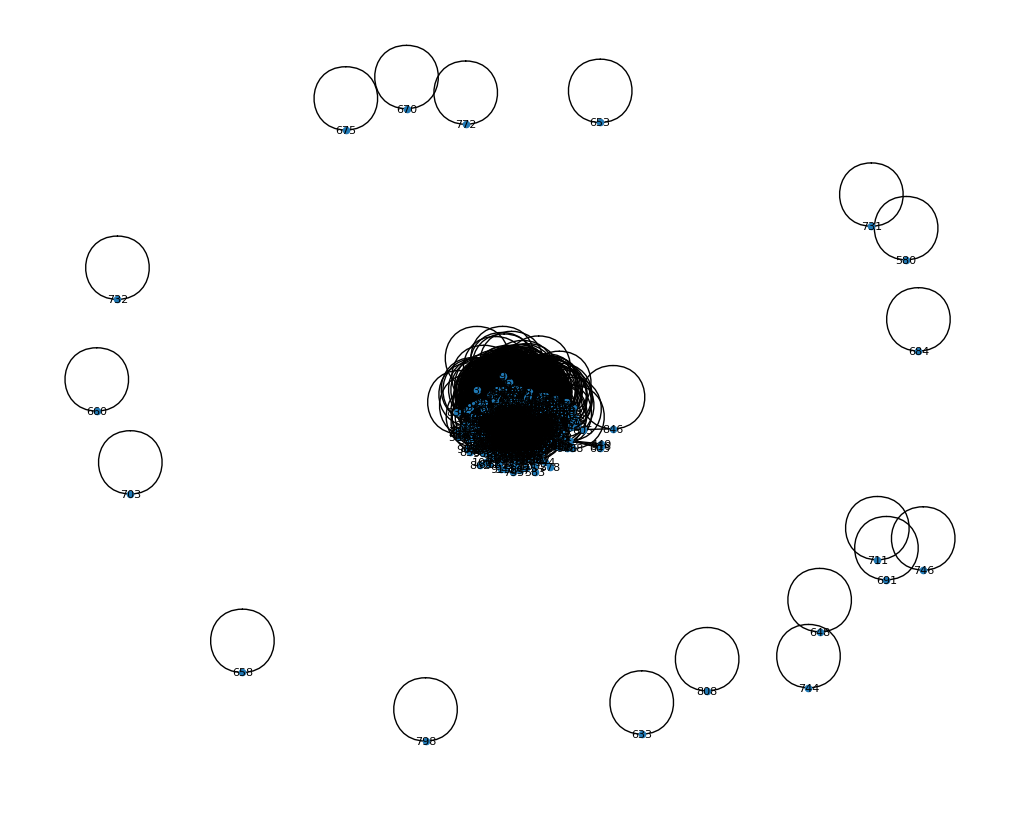

In [ ]:
import networkx as nx

edges_file_path = '/content/sample_data/email-Eu-core.txt'
graph = nx.read_edgelist(edges_file_path, nodetype=int)

#  basic information about the graph:
print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
nx.draw(graph, with_labels=True, font_size=8, node_size=20)
plt.show()


Number of nodes: 1005
Number of edges: 16706
Department of node 0: 1


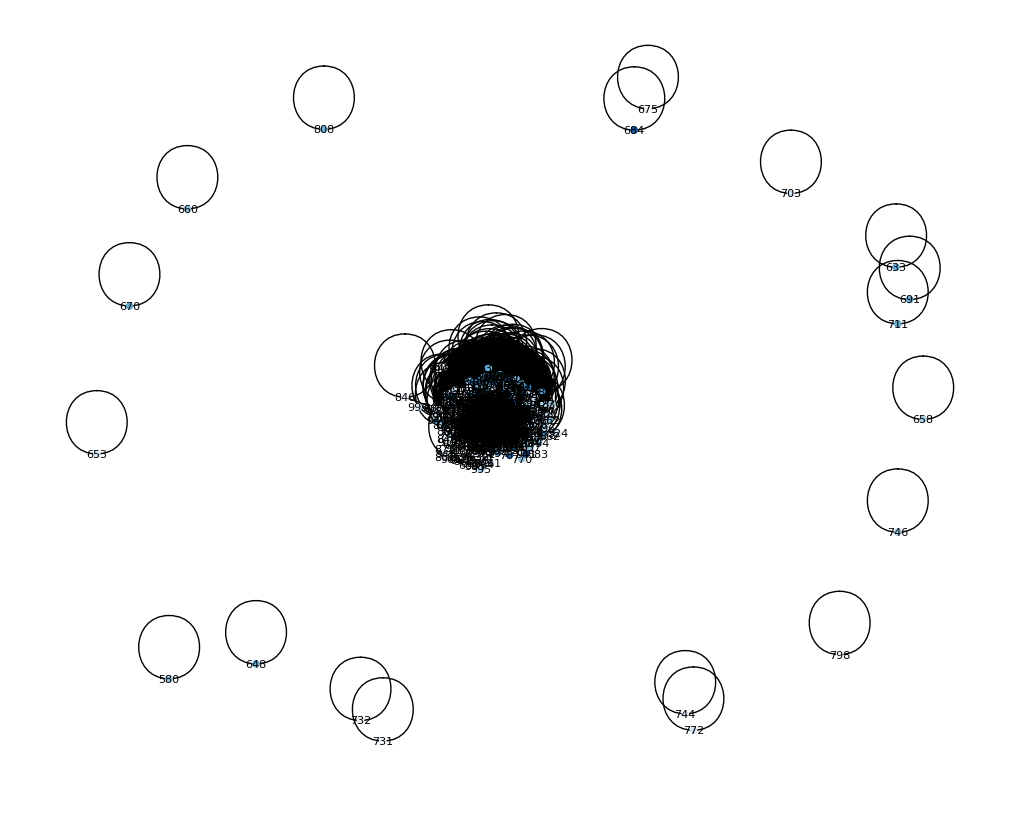

In [ ]:

# Load department labels data from the file
labels_file_path = '/content/sample_data/email-Eu-core-department-labels.txt'
with open(labels_file_path, 'r') as labels_file:
    for line in labels_file:
        node_id, department_id = map(int, line.strip().split())
        graph.nodes[node_id]['department'] = department_id

print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())

# example
node_id = 0
print(f"Department of node {node_id}: {graph.nodes[node_id].get('department', 'N/A')}")

colors = [graph.nodes[node]['department'] for node in graph.nodes]
plt.figure(figsize=(10, 8))
nx.draw(graph, with_labels=True, font_size=8, node_size=20, node_color=colors, cmap=plt.cm.Blues)
plt.show()


In [ ]:
# Calculate the average degree
average_degree = sum(dict(graph.degree()).values()) / graph.number_of_nodes()

print(f"Average Degree: {average_degree}")


Average Degree: 33.245771144278606


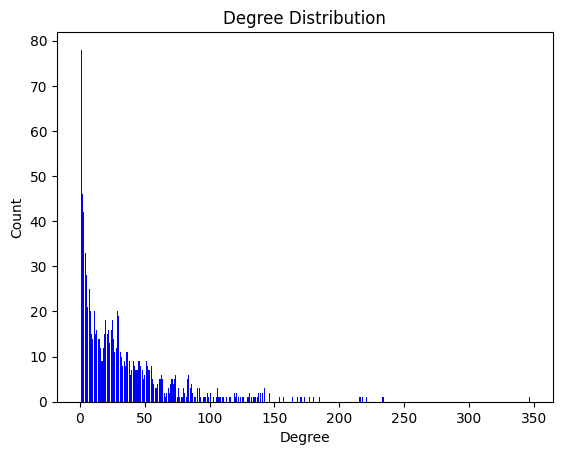

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
degree_counts = nx.degree_histogram(graph)

plt.bar(range(len(degree_counts)), degree_counts, width=0.8, color='b')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()


Degree Bin: 0-9, Percentage of Nodes: 30.65%
Degree Bin: 10-19, Percentage of Nodes: 14.03%
Degree Bin: 20-29, Percentage of Nodes: 15.22%
Degree Bin: 30-39, Percentage of Nodes: 10.15%
Degree Bin: 40-49, Percentage of Nodes: 7.56%
Degree Bin: 50-59, Percentage of Nodes: 5.97%
Degree Bin: 60-69, Percentage of Nodes: 3.48%
Degree Bin: 70-79, Percentage of Nodes: 3.08%
Degree Bin: 80-89, Percentage of Nodes: 2.79%
Degree Bin: 90-99, Percentage of Nodes: 1.29%
Degree Bin: 100-109, Percentage of Nodes: 0.90%
Degree Bin: 110-119, Percentage of Nodes: 0.70%
Degree Bin: 120-129, Percentage of Nodes: 0.80%
Degree Bin: 130-139, Percentage of Nodes: 1.09%
Degree Bin: 140-149, Percentage of Nodes: 0.70%
Degree Bin: 150-159, Percentage of Nodes: 0.20%
Degree Bin: 160-169, Percentage of Nodes: 0.20%
Degree Bin: 170-179, Percentage of Nodes: 0.40%
Degree Bin: 180-189, Percentage of Nodes: 0.20%
Degree Bin: 190-199, Percentage of Nodes: 0.00%
Degree Bin: 200-209, Percentage of Nodes: 0.00%
Degree Bin

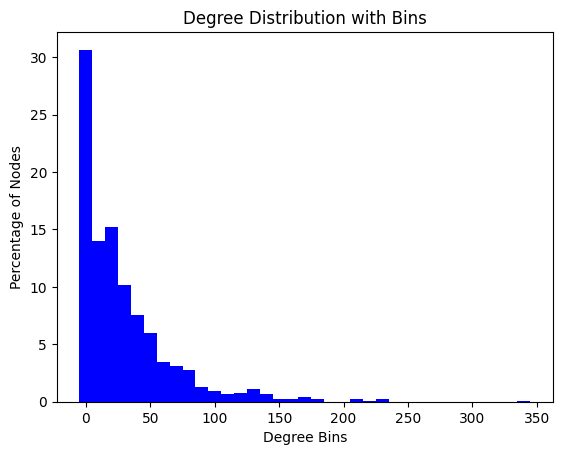

In [ ]:
# Set the bin size
bin_size = 10

# Create bins and calculate binned degrees
bins = [i for i in range(0, len(degree_counts) * bin_size, bin_size)]
binned_degrees = [sum(degree_counts[i:i+bin_size]) for i in range(0, len(degree_counts), bin_size)]

# Calculate the percentage of nodes in each bin
total_nodes = len(graph.nodes())
percentage_nodes_in_bins = [count / total_nodes * 100 for count in binned_degrees]

# Trim the lists to the minimum length
min_length = min(len(bins), len(percentage_nodes_in_bins))
bins = bins[:min_length]
percentage_nodes_in_bins = percentage_nodes_in_bins[:min_length]

# Print and plot the results
for b, p in zip(bins, percentage_nodes_in_bins):
    print(f"Degree Bin: {b}-{b+bin_size-1}, Percentage of Nodes: {p:.2f}%")

plt.bar(bins, percentage_nodes_in_bins, width=bin_size, color='b')
plt.title("Degree Distribution with Bins")
plt.xlabel("Degree Bins")
plt.ylabel("Percentage of Nodes")
plt.show()

In [ ]:
!pip install powerlaw

Calculating best minimal value for power law fit


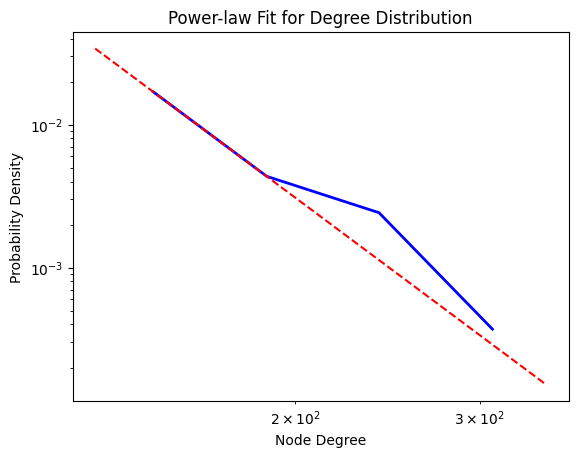

Power-law alpha parameter: 5.468468039480114
Minimum degree: 129.0
Maximum degree: None
Number of data points: 35.0
Log-likelihood ratio of the fit: <bound method Fit.loglikelihood_ratio of <powerlaw.Fit object at 0x7eee1be6be20>>
Distribution Comparison (Power-law vs. Exponential):
(0.6774370697050873, 0.560880949953311)


In [ ]:
import powerlaw

# Fit the power-law distribution
fit = powerlaw.Fit(degree_sequence, discrete=True)

# Plot the data and the fitted power-law distribution
fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=plt.gca())

plt.title('Power-law Fit for Degree Distribution')
plt.xlabel('Node Degree')
plt.ylabel('Probability Density')
plt.show()

alpha_parameter = fit.alpha
print(f'Power-law alpha parameter: {alpha_parameter}')

print(f'Minimum degree: {fit.xmin}')
print(f'Maximum degree: {fit.xmax}')
print(f'Number of data points: {fit.n}')
print(f'Log-likelihood ratio of the fit: {fit.loglikelihood_ratio}')

print('Distribution Comparison (Power-law vs. Exponential):')
print(fit.distribution_compare('power_law', 'exponential'))


Certainly! Here are some observations and insights based on the provided degree distribution and power-law fit:

1. **Degree Distribution:**
   - The majority of nodes (30.65%) have a degree in the range of 0-9, indicating a substantial portion of the network with low connectivity.
   - Nodes with degrees in the range of 10-29 collectively make up around 29.25% of the network.
   - There is a gradual decline in the percentage of nodes as the degree increases, with higher-degree nodes becoming less common.

2. **Power-law Fit:**
   - The power-law alpha parameter is approximately 5.47, indicating a heavy-tailed distribution. This suggests the presence of a few nodes with significantly higher degrees than the majority.
   - The minimum observed degree in the network is 129, emphasizing the existence of highly connected nodes.
   - The log-likelihood ratio of the power-law fit is positive (0.677), suggesting a better fit to the power-law distribution than an exponential distribution.

3. **Distribution Comparison:**
   - The distribution comparison between a power-law and an exponential distribution yields a positive log-likelihood ratio (0.677) and a p-value of 0.561. While the power-law fit is favored, the difference is not highly significant.

4. **Overall Network Structure:**
   - The heavy-tailed degree distribution and power-law fit suggest a scale-free network, common in various real-world complex systems.
   - The presence of nodes with high degrees may indicate influential or central nodes that play crucial roles in the network.



In [ ]:


source_node = 10  # Replace with your desired source node
target_node = 1  # Replace with your desired target node
shortest_path = nx.shortest_path(graph, source=source_node, target=target_node)
print(f"Shortest Path from Node {source_node} to Node {target_node}: {shortest_path}")




Shortest Path from Node 10 to Node 1: [10, 21, 1]


In [ ]:
import networkx as nx

# Calculate shortest path lengths
shortest_paths = []
for source in graph.nodes:
    for target in graph.nodes:
        if source != target:
            try:
                length = nx.shortest_path_length(graph, source=source, target=target)
                shortest_paths.append(length)
            except nx.NetworkXNoPath:
                pass  # Ignore cases where there is no path

print(f"Number of pairs with a path: {len(shortest_paths)}")
print(f"Maximum shortest path length: {max(shortest_paths)}")
print(f"Minimum shortest path length: {min(shortest_paths)}")
print(f"Average shortest path length: {sum(shortest_paths) / len(shortest_paths)}")


Number of pairs with a path: 971210
Maximum shortest path length: 7
Minimum shortest path length: 1
Average shortest path length: 2.586933824816466


Shortest Path Length 1: 3.31%
Shortest Path Length 2: 42.75%
Shortest Path Length 3: 46.35%
Shortest Path Length 4: 7.14%
Shortest Path Length 5: 0.43%
Shortest Path Length 6: 0.02%
Shortest Path Length 7: 0.00%


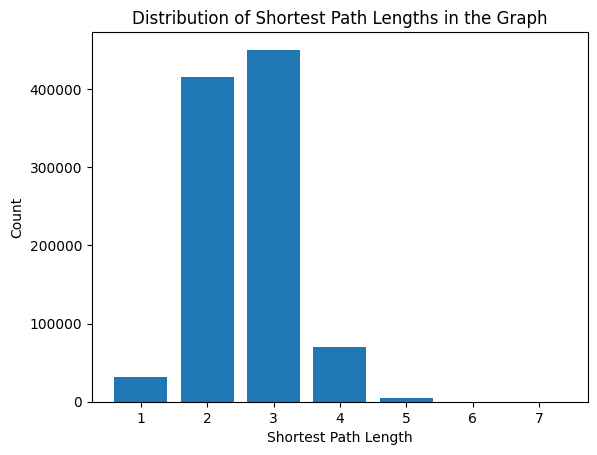

In [ ]:
from collections import Counter

element_counts = Counter(shortest_paths)

total_count = sum(element_counts.values())
percentages = {element: (count / total_count * 100) for element, count in element_counts.items()}

for element, percentage in percentages.items():
    print(f"Shortest Path Length {element}: {percentage:.2f}%")

elements, counts = zip(*element_counts.items())
plt.bar(elements, counts)
plt.xlabel("Shortest Path Length")
plt.ylabel("Count")
plt.title("Distribution of Shortest Path Lengths in the Graph")
plt.show()

In [ ]:
# Average Path Length for each connected component
avg_path_lengths = []
for component in nx.connected_components(graph):
    subgraph = graph.subgraph(component)
    avg_path_length = nx.average_shortest_path_length(subgraph)
    avg_path_lengths.append(avg_path_length)

# Overall Average Path Length
overall_avg_path_length = sum(avg_path_lengths) / len(avg_path_lengths)
print(f"Overall Average Path Length: {overall_avg_path_length:.2f}")


Overall Average Path Length: 0.13


In [ ]:
# Diameter for each connected component
component_diameters = []
for component in nx.connected_components(graph):
    subgraph = graph.subgraph(component)
    try:
        diameter = nx.diameter(subgraph)
        component_diameters.append(diameter)
    except nx.NetworkXError:
        #  case where the component is not connected
        pass

# Overall Diameter
overall_diameter = max(component_diameters)
print(f"Overall Diameter of the Network: {overall_diameter}")


Overall Diameter of the Network: 7


Clustering Coefficient for Node 0: 0.2764227642276423
Clustering Coefficient for Node 1: 0.2653061224489796
Clustering Coefficient for Node 2: 0.2978027115474521
Clustering Coefficient for Node 3: 0.38491048593350385
Clustering Coefficient for Node 4: 0.31869137497140243
Clustering Coefficient for Node 5: 0.10700197238658778
Clustering Coefficient for Node 6: 0.15518331226295828
Clustering Coefficient for Node 7: 0.28778467908902694
Clustering Coefficient for Node 8: 0.4470588235294118
Clustering Coefficient for Node 9: 0.42532005689900426
Clustering Coefficient for Node 10: 0.3154486586493987
Clustering Coefficient for Node 11: 0.22917437985931136
Clustering Coefficient for Node 12: 0.3025974025974026
Clustering Coefficient for Node 13: 0.11089951120421507
Clustering Coefficient for Node 14: 0.21578421578421578
Clustering Coefficient for Node 15: 0.3526530612244898
Clustering Coefficient for Node 16: 0.28470936690114773
Clustering Coefficient for Node 17: 0.28593272171253825
Clusterin

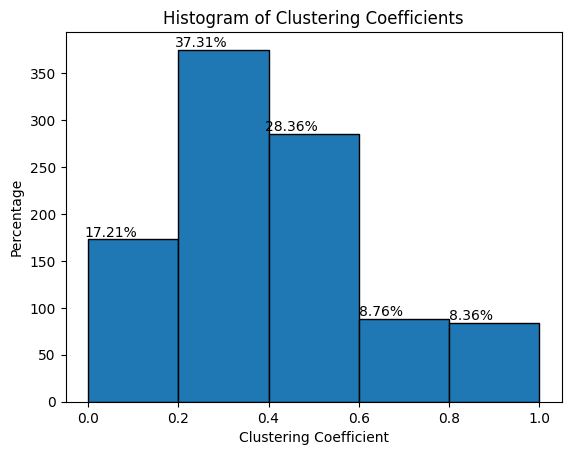


Average Clustering Coefficient: 0.3993549664221539


In [ ]:


clustering_coefficients = nx.clustering(graph)


average_clustering_coefficient = nx.average_clustering(graph)

for node, cc in clustering_coefficients.items():
    print(f"Clustering Coefficient for Node {node}: {cc}")

bins = [i * 0.2 for i in range(6)]
counts, bins, patches = plt.hist(list(clustering_coefficients.values()), bins=bins, edgecolor='black')

for i, count in enumerate(counts):
    print(f"Bin {i+1} ({bins[i]:.2f}-{bins[i+1]:.2f}): {count} nodes")

total_nodes = len(clustering_coefficients)
for count, bin_value, patch in zip(counts, bins, patches):
    percentage = count / total_nodes * 100
    plt.text(bin_value + 0.05, count + 0.01, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Histogram of Clustering Coefficients')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Percentage')
plt.show()

print("\nAverage Clustering Coefficient:", average_clustering_coefficient)


# **Insights**

1. **Distribution Overview:**
   - Majority of nodes have low clustering coefficients (0.00-0.40).
   - Significant nodes in higher clustering coefficients (0.40-0.80).

2. **Average Clustering Coefficient:**
   - Overall graph has a moderate average clustering coefficient (0.40).

3. **Interpretation:**
   - Low coefficients may indicate less local connectivity for some nodes.
   - High coefficients suggest cohesive groups or communities.

4. **Graph Structure:**
   - Balance between local clustering and potential global connectivity.

5. **Next Steps:**
   - Explore high-coefficient nodes for tight-knit groups.
   - Investigate low-coefficient nodes for potential outliers.



email-Eu-core network dataset forms an undierected graph hence the concept of Stringly Connected Components does not apply. Hence the concept of number of connected components apply.

In [ ]:
# Number of Connected Components
num_cc = nx.number_connected_components(graph)
print(f"Number of Connected Components: {num_cc}")


Number of Connected Components: 20


and so the similar happens in case of the wcc too

In [ ]:

connected_components = list(nx.connected_components(graph))

giant_component = max(connected_components, key=len)

giant_component_graph = graph.subgraph(giant_component)

# Calculate properties for the giant component
giant_shortest_path = nx.average_shortest_path_length(giant_component_graph)
giant_avg_path_length = nx.average_shortest_path_length(giant_component_graph)
giant_diameter = nx.diameter(giant_component_graph)
giant_avg_cc = nx.average_clustering(giant_component_graph)

print(f"Giant Component Shortest Path: {giant_shortest_path:.2f}")
print(f"Giant Component Average Path Length: {giant_avg_path_length:.2f}")
print(f"Giant Component Diameter: {giant_diameter}")
print(f"Giant Component Average Clustering Coefficient: {giant_avg_cc:.2f}")


Giant Component Shortest Path: 2.59
Giant Component Average Path Length: 2.59
Giant Component Diameter: 7
Giant Component Average Clustering Coefficient: 0.41


Graph Coverage Percentage: 98.11%



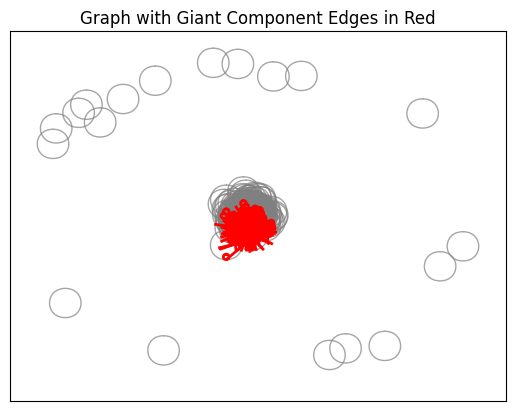

In [ ]:

pos = nx.spring_layout(graph)

nx.draw_networkx_nodes(graph, pos, nodelist=[], node_color='none')
nx.draw_networkx_edges(graph, pos, edge_color='gray', alpha=0.7)

nx.draw_networkx_edges(giant_component_graph, pos, edge_color='red', width=2)

# Calculate coverage percentage
total_nodes = len(graph.nodes())
giant_component_nodes = len(giant_component)
coverage_percentage = (giant_component_nodes / total_nodes) * 100

print(f"Graph Coverage Percentage: {coverage_percentage:.2f}%")

print()
plt.title('Graph with Giant Component Edges in Red')
plt.show()

In [ ]:

# Calculate k-connected components
k_components = nx.k_components(graph)

# Plot the k-connected components
for k, components in k_components.items():
    for component in components:
        subgraph = graph.subgraph(component)
        pos = nx.spring_layout(subgraph)
        nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', edge_color='gray', alpha=0.7)
        plt.title(f'{k}-Connected Component')
        plt.show()

# Analyze statistics related to k-connectedness
for k, components in k_components.items():
    num_components = len(components)
    largest_component_size = max(len(component) for component in components)
    print(f'For k = {k}:')
    print(f'Number of Components: {num_components}')
    print(f'Size of Largest Component: {largest_component_size}')
    print('---')


KeyboardInterrupt: 

In [ ]:
for k in range(1, 1000):
    is_k_connected = nx.is_k_edge_connected(graph, k)
    print(f"The graph is {'' if is_k_connected else 'not '} {k}-connected.")

The graph is not  1-connected.
The graph is not  2-connected.
The graph is not  3-connected.
The graph is not  4-connected.
The graph is not  5-connected.
The graph is not  6-connected.
The graph is not  7-connected.
The graph is not  8-connected.
The graph is not  9-connected.
The graph is not  10-connected.
The graph is not  11-connected.
The graph is not  12-connected.
The graph is not  13-connected.
The graph is not  14-connected.
The graph is not  15-connected.
The graph is not  16-connected.
The graph is not  17-connected.
The graph is not  18-connected.
The graph is not  19-connected.
The graph is not  20-connected.
The graph is not  21-connected.
The graph is not  22-connected.
The graph is not  23-connected.
The graph is not  24-connected.
The graph is not  25-connected.
The graph is not  26-connected.
The graph is not  27-connected.
The graph is not  28-connected.
The graph is not  29-connected.
The graph is not  30-connected.
The graph is not  31-connected.
The graph is not 

In [ ]:
# Find the number of triangles in the graph
num_triangles = sum(nx.triangles(graph).values()) // 3

print(f"Number of triangles in the graph: {num_triangles}")

Number of triangles in the graph: 105461


In [ ]:
# Calculate the fraction of closed triangles in the graph
fraction_closed_triangles = nx.transitivity(graph)

print(f"Fraction of closed triangles in the graph: {fraction_closed_triangles:.4f}")

Fraction of closed triangles in the graph: 0.2674


In [ ]:
# Assuming 'graph' is your graph
k_components = nx.k_components(graph)
print(f"K-Components: {k_components}")


KeyboardInterrupt: 

In [ ]:
# Assuming 'graph' is your graph
k_value = 2  # Adjust the value of k as needed

# K-Edge-Connected Components
k_edge_components = list(nx.k_edge_components(graph, k=k_value))
print(f"K-Edge-Connected Components: {k_edge_components}")

# K-Edge-Connected Subgraphs
k_edge_subgraphs = list(nx.k_edge_subgraphs(graph, k=k_value))
print(f"K-Edge-Connected Subgraphs: {k_edge_subgraphs}")